## Data Description

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.


Columns of dataset:
*  0   HeartDisease - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
*  1   BMI - Body Mass Index (BMI)     
*  2   Smoking - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]    
*  3   AlcoholDrinking - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week 
*  4   Stroke - (Ever told) (you had) a stroke?      
*  5   PhysicalHealth - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)   
*  6   MentalHealth - Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)     
*  7   DiffWalking - Do you have serious difficulty walking or climbing stairs?     
*  8   Sex - Are you male or female?    
*  9   AgeCategory - Fourteen-level age category    
*  10  Race - Race             
*  11  Diabetic - Are you diabetic?       
*  12  PhysicalActivity - Do you have physical activity? 
*  13  GenHealth - Status of general health         
*  14  SleepTime - Sleep hours   
*  15  Asthma - (Ever told) (you had) a Asthma?         
*  16  KidneyDisease - (Ever told) (you had) a kidney disease?   
*  17  SkinCancer - (Ever told) (you had) a skin cancer?

**The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals).** 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#### Setup file path

In [3]:
from pathlib import Path
import sys

FILE = Path("../data/raw/heart_2020.csv")
sys.path.append("..")

## Data Analysis

In [4]:
raw_df = pd.read_csv(FILE)
raw_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
raw_df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
raw_df.describe(include=["O"])

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187887,298018,307726,275385,167805,34151,245212,269653,247957,113858,276923,308016,289976


## Exploratory Data Analysis (EDA) 

### Feature: target class

<AxesSubplot:title={'center':'Distribution of people with heart disease in this dataset'}>

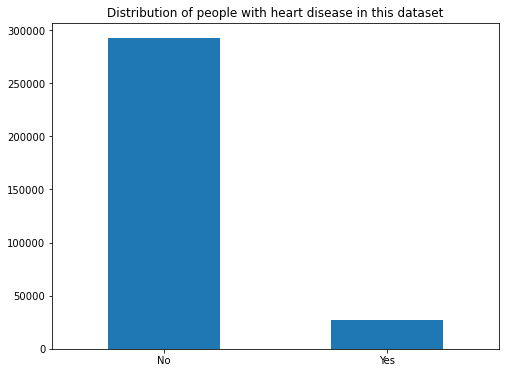

In [8]:
title = "Distribution of people with heart disease in this dataset"

raw_df["HeartDisease"].value_counts().plot(kind="bar", rot=360, figsize=(8, 6), title=title)

**As you can see, this dataset is heavily unbalanced. To ensure our model's accuracy, we need to balance our dataset later.**

## Take a look at numerical features

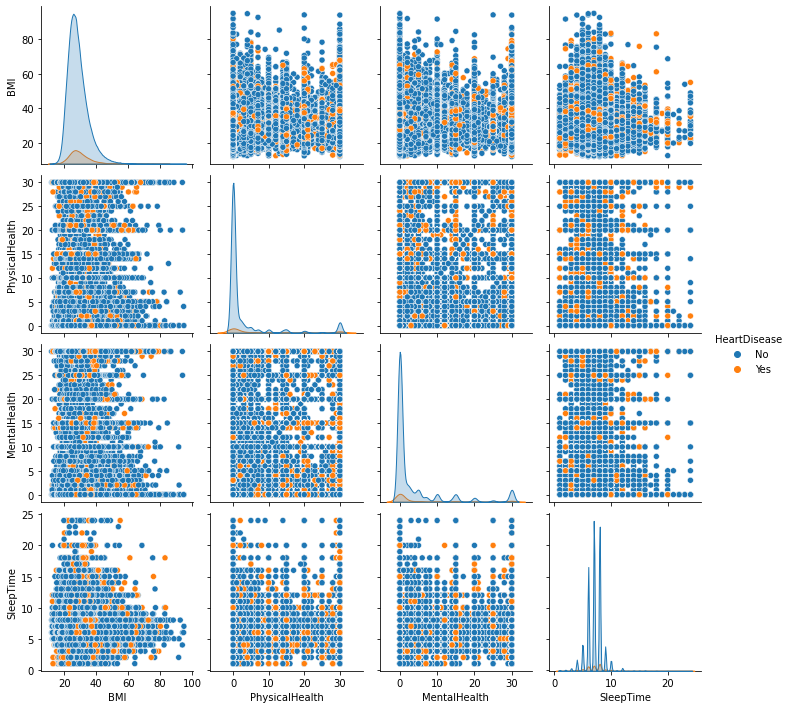

In [10]:
sns.pairplot(raw_df, hue="HeartDisease")

**Based on the pair plot, we can see that these numerical features have no linear relationship with each other in two-dimensional space.**

**In this case, we hope this dataset can be clearly seperated in high dimensional space and we will use different ML algorithms to test it out.**

In [ ]:
def plot_numerical_feature(data, feature):
    